# Лекция 5. Решение задач по теме "Простейшие системы массового обслуживания"

- Задача 1
- Задача 2
- Задача 3
- Задача 4
- Задача 5
- Задача 6
- Задача 7
- Задачи для самостоятельного решения

## Задача 1.

Кластер состоит из основного сервера и одной реплики. Для работы достаточно, чтобы работал хотя бы один компьютер. Поток отказов каждого компьютера простейший с параметром $\lambda$. При выходе компьютера из строя, он тут же начинает ремонтироваться. Время ремонта показательное с параметром $\mu$. В начальный момент оба узла кластера работают. Найти:
- вероятности состояний, как функции времени: $S_0$ - оба узла исправны, $S_1$ - один узел исправен, второй ремонтируется, $S_2$ - оба узла ремонтируются;
- вероятность того, что за время $\tau$ кластер ни разу не прекратит работу;
- финальные вероятности состояний всей системы;
- для стационарного режима среднее время, в течение которого кластер будет работать без отказов.

**Решение.**

<img src="ris1.jpeg">

Уравнения Колмогорова имеют вид:
$$\frac{dP_0(t)}{dt}=\mu P_1(t)-2\lambda P_0(t), \\ \frac{dP_1(t)}{dt}=2\lambda P_0(t)-(\lambda+\mu)P_1(t)+2\mu P_2(t), \\ \frac{dP_2(t)}{dt}=\lambda P_1(t)-2\mu P_2(t) $$
Также должно выполняться $P_0(t)+P_1(t)+P_2(t)=1$. Начальные условия: $P_0(0)=1, P_1(0)=P_2(0)=0$.

Выполним преобразование Лапласа (cвойство 6. Лекция 2: $L(F'(t))=s\alpha(s)-F(0)$):

$$sP_0(s)-1=\mu P_1(s)-2\lambda P_0(s)$$
$$sP_1(s)=2\lambda P_0(s)-(\lambda+\mu) P_1(s)+2\mu P_2(s)$$
$$sP_2(s)=\lambda P_1(s)-2\mu P_2(s)$$

Вместо одного из уравнений подставим уравнение нормировки: $$P_0(s)+P_1(s)+P_2(s)=\frac{1}{s}$$

Для решения системы линейных уравнений воспользуемся [maxima](https://maxima.sourceforge.io/ru/index.html)

In [7]:
solve([P0+P1+P2=1/s, s*P1=2*lambda*P0-(lambda+mu)*P1+2*mu*P2, s*P2=lambda*P1-2*mu*P2],[P0,P1,P2]);

                                                   2       2
                              s (lambda + 3 mu) + s  + 2 mu
(%o10) [[P0 = ---------------------------------------------------------------, 
                         2                     2     2                      3
              s (2 lambda  + 4 mu lambda + 2 mu ) + s  (3 lambda + 3 mu) + s
                        2 s lambda + 4 mu lambda
P1 = ---------------------------------------------------------------, 
                2                     2     2                      3
     s (2 lambda  + 4 mu lambda + 2 mu ) + s  (3 lambda + 3 mu) + s
                                        2
                                2 lambda
P2 = ---------------------------------------------------------------]]
                2                     2     2                      3
     s (2 lambda  + 4 mu lambda + 2 mu ) + s  (3 lambda + 3 mu) + s

Выполним в maxima обратное преобразование Лапласа:

In [10]:
ilt((s*(lambda+3*mu)+s^2+2*mu^2)/(s*(2*lambda^2+4*mu*lambda+2*mu^2)+s^2*(3*lambda+3*mu)+s^3),s,t);

            2   - t (2 lambda + 2 mu)                 - t (lambda + mu)
      lambda  %e                        2 mu lambda %e
(%o8) ------------------------------- + -------------------------------
              2                   2             2                   2
        lambda  + 2 mu lambda + mu        lambda  + 2 mu lambda + mu
                                                                  2
                                                                mu
                                                  + ---------------------------
                                                          2                   2
                                                    lambda  + 2 mu lambda + mu

In [11]:
ilt((2*s*lambda+4*mu*lambda)/(s*(2*lambda^2+4*mu*lambda+2*mu^2)+s^2*(3*lambda+3*mu)+s^3),s,t);

                 2   - t (2 lambda + 2 mu)
         2 lambda  %e
(%o9) (- ---------------------------------)
                  2                   2
            lambda  + 2 mu lambda + mu
             2                  - t (lambda + mu)
    (2 lambda  - 2 mu lambda) %e                            2 mu lambda
  + --------------------------------------------- + ---------------------------
                   2                   2                  2                   2
             lambda  + 2 mu lambda + mu             lambda  + 2 mu lambda + mu

In [12]:
ilt(2*lambda^2/(s*(2*lambda^2+4*mu*lambda+2*mu^2)+s^2*(3*lambda+3*mu)+s^3),s,t);

             2   - t (2 lambda + 2 mu)           2   - t (lambda + mu)
       lambda  %e                        2 lambda  %e
(%o10) ------------------------------- - -----------------------------
               2                   2            2                   2
         lambda  + 2 mu lambda + mu       lambda  + 2 mu lambda + mu
                                                                    2
                                                              lambda
                                                  + ---------------------------
                                                          2                   2
                                                    lambda  + 2 mu lambda + mu

Финальные вероятности системы:
$$P_0=\frac{\mu^2}{(\lambda+\mu)^2}, P_1=\frac{2\lambda\mu}{(\lambda+\mu)^2}, P_2=\frac{\lambda^2}{(\lambda+\mu)^2}$$

Вероятность, что кластер будет работать без отказа равно $1-P_2$ - это в тоже время доля времени, в течение которого система будет работать без отказа. Доля времени, в течение которого система не работает $P_2$. Имеем соотношение:
$$\frac{1-P_2}{P_2}=\frac{1}{P_2}-1=\frac{\tau_{\text{раб}}}{\tau_{\text{нераб}}}$$

Время, в течение которого ситема не работает $\tau_{\text{нераб}}=\frac{1}{2\mu}$ (из нерабочего сотояния мы переходим с интенсивностью $2\mu$).

Тогда среднее время, в течение которого кластер будет работать без отказов:
$$\tau_{\text{раб}}=\frac{1}{2\mu P_2}-\frac{1}{2\mu}$$

 

Чтобы найти вероятность того, что за время $\tau$ кластер ни разу не прекратит работу, сделаем состояние $S_2$ поглощающим - если мы в него попали, то уже не можем выйти. Уравнения преобразуются к виду:
$$\frac{dP_0(t)}{dt}=\mu P_1(t)-2\lambda P_0(t), \frac{dP_1(t)}{dt}=2\lambda P_0(t)-(\lambda+\mu)P_1(t), \frac{dP_2(t)}{dt}=\lambda P_1(t) $$
Учтем в решении только первые два уравнения:
$$sP_0(s)-1=\mu P_1(s)-2\lambda P_0(s)$$
$$sP_1(s)=2\lambda P_0(s)-(\lambda+\mu) P_1(s)$$

In [8]:
solve([s*P1=2*lambda*P0-(lambda+mu)*P1, s*P0-1=mu*P1-2*lambda*P0],[P0,P1]);

                       lambda + s + mu
(%o11) [[P0 = ----------------------------------, 
                      2                 2
              2 lambda  + 3 s lambda + s  + mu s
                                                        2 lambda
                                      P1 = ----------------------------------]]
                                                   2                 2
                                           2 lambda  + 3 s lambda + s  + mu s

In [6]:
assume(lambda^2+6*lambda*mu+mu^2>0)$
ilt((lambda+s+mu)/(2*lambda^2+3*s*lambda+s^2+mu*s),s,t);

          t (3 lambda + mu)
        - -----------------
                  2
(%o9) %e
                                                      2                   2
                                         t sqrt(lambda  + 6 mu lambda + mu )
  (2 (lambda + mu) - 3 lambda - mu) sinh(-----------------------------------)
                                                          2
 (---------------------------------------------------------------------------
                                  2                   2
                       sqrt(lambda  + 6 mu lambda + mu )
                     2                   2
        t sqrt(lambda  + 6 mu lambda + mu )
 + cosh(-----------------------------------))
                         2

In [9]:
ilt((2*lambda)/(2*lambda^2+3*s*lambda+s^2+mu*s),s,t);

                    t (3 lambda + mu)
                  - -----------------                   2                   2
                            2              t sqrt(lambda  + 6 mu lambda + mu )
       4 lambda %e                    sinh(-----------------------------------)
                                                            2
(%o12) ------------------------------------------------------------------------
                                     2                   2
                          sqrt(lambda  + 6 mu lambda + mu )

Искомая вероятность выражается как $P(\tau)=P_0(\tau)+P_1(\tau)$. Заметим, что $P(\infty)=0$.

*Модификация 1*

Пока один узел работает, другой работает в холодном резерве и выходить из строя не может.

*Модификация 2*

Пока один узел работает, другой работает в облегченном резерве и выходит из строя с интенсивностью $\lambda'$.

## Задача 2.

ЭВМ подвергается простейшему потоку отказов с интенсивностью $\lambda$. Отказ обнаруживается не сразу, а через случайное время, распределенное по показательному закону с параметром $\nu$. Как только отказ обнаруживается, производится осмотр, время осмотра показательное с параметром $\gamma$. В результате осмотра ЭВМ либо направляется на ремонт с вероятностью $p$, либо заменяется на исправную. Время ремонта показательное с параметром $\mu$, время замены на исправный тоже показательное с параметром $\omega$.

Определить:
- какую долю времени в среднем ЭВМ будет работать нормально;
- какую долю времени ЭВМ будет работать с необнаруженным отказом;
- какова средняя стоимость ремонтов и замен за единицу времени, если средняя стоимость ремонта равна $r$, средняя стоимость замены равна $c$.
- какова средняя величина потерь за единицу времени от работающей неисправной ЭВМ, если убыток в единицу времени оценивается в $l$ единиц.

### Решение.

Нарисуем граф состояний:

<img src="dia1.jpeg">

Состояния имеют следующую интерпретацию:

$S_0$ - ЭВМ исправно;

$S_1$ - неисправно, но отказ не обнаружен;

$S_2$ - неисправность обнаружена, ведется осмотр;

$S_3$ - ремонтируется

$S_4$ - заменяется на новый

Запишем уравнения Колмогорова для вероятностей нахождения в каждом из состояний:

$$\frac{dP_0(t)}{dt}=-\lambda\cdot P_0(t)+\mu\cdot P_3(t)+\omega\cdot P_4(t)$$
$$\frac{dP_1(t)}{dt}=\lambda\cdot P_0(t)-\nu\cdot P_1(t)$$
$$\frac{dP_2(t)}{dt}=\nu\cdot P_1(t)-p\gamma\cdot P_2(t)-(1-p)\gamma\cdot P_2(t)=\nu\cdot P_1(t)-\gamma\cdot P_2(t)$$
$$\frac{dP_3(t)}{dt}=p\cdot\gamma P_2(t)-\mu\cdot P_3(t)$$
$$\frac{dP_4(t)}{dt}=(1-p)\gamma\cdot P_2(t)-\omega\cdot P_4(t)$$

Попробуем решим данную систему линейных дифференциальных уравнений в Maxima:

In [1]:
/* Зададимся некоторыми начальными значениями */
p:0.6$ lambda:0.3$ nu: 0.5$ gamma:0.7$ mu:0.4$ omega:0.7$
/* Задаем начальные условия */
atvalue(P0(t),t=0,1)$
atvalue(P1(t),t=0,0)$
atvalue(P2(t),t=0,0)$
atvalue(P3(t),t=0,0)$
atvalue(P4(t),t=0,0)$
/* Решаем систему линейных дифференциальных уравнений */
result:desolve(['diff(P0(t),t)=-lambda*P0(t)+mu*P3(t)+omega*P4(t),
         'diff(P1(t),t)=lambda*P0(t)-nu*P1(t),
         'diff(P2(t),t)=nu*P1(t)-gamma*P2(t),
         'diff(P3(t),t)=p*gamma*P2(t)-mu*P3(t),
         'diff(P4(t),t)=(1-p)*gamma*P2(t)-omega*P4(t)],
        [P0(t),P1(t),P2(t),P3(t),P4(t)]);


rat: replaced -0.3 by -3/10 = -0.3

rat: replaced 0.4 by 2/5 = 0.4

rat: replaced 0.7 by 7/10 = 0.7

rat: replaced -0.3 by -3/10 = -0.3

rat: replaced 0.4 by 2/5 = 0.4

rat: replaced 0.7 by 7/10 = 0.7

rat: replaced 0.3 by 3/10 = 0.3

rat: replaced -0.5 by -1/2 = -0.5

rat: replaced 0.3 by 3/10 = 0.3

rat: replaced -0.5 by -1/2 = -0.5

rat: replaced 0.5 by 1/2 = 0.5

rat: replaced -0.7 by -7/10 = -0.7

rat: replaced 0.5 by 1/2 = 0.5

rat: replaced -0.7 by -7/10 = -0.7

rat: replaced 0.42 by 21/50 = 0.42

rat: replaced -0.4 by -2/5 = -0.4

rat: replaced 0.42 by 21/50 = 0.42

rat: replaced -0.4 by -2/5 = -0.4

rat: replaced 0.28 by 7/25 = 0.28

rat: replaced -0.7 by -7/10 = -0.7

rat: replaced 0.28 by 7/25 = 0.28

rat: replaced -0.7 by -7/10 = -0.7

rat: replaced 0.3 by 3/10 = 0.3

rat: replaced -0.4 by -2/5 = -0.4

rat: replaced -0.7 by -7/10 = -0.7

rat: replaced -0.3 by -3/10 = -0.3

rat: replaced 0.5 by 1/2 = 0.5

rat: replaced -0.5 by -1/2 = -0.5

rat: replaced 0.7 by 7/10 = 0.7

r

(%o11) [P0(t) = 
                      3              2
           330000 g713  + 699000 g713  + 505500 g713 + 120930
ilt(----------------------------------------------------------------, g713, t)
                  4             3             2
    53 (10000 g713  + 26000 g713  + 26400 g713  + 13060 g713 + 2597)
   20
 + --, P1(t) = 
   53
                         3              2
              120000 g713  + 153000 g713  + 30600 g713 - 10230
ilt(- ----------------------------------------------------------------, g713, 
                    4             3             2
      53 (10000 g713  + 26000 g713  + 26400 g713  + 13060 g713 + 2597)
     12
t) + --, P2(t) = 
     53
                       3               2
            600000 g713  + 1560000 g713  + 1027500 g713 + 171450
ilt(- -----------------------------------------------------------------, g713, 
                     4             3             2
      371 (10000 g713  + 26000 g713  + 26400 g713  + 13060 g713 + 2597)
     60
t)

Видно, что Maxima не выполнила преобразования до конца и остановилась на необходимости выполнить обратное преобразование Лапласа от сложного выражения, где $g_{713}$ интерпретируется как $s$.

Ниже вычисление в WolframAlpha:

[WolframAlpha для $P_0(t)$](https://www.wolframalpha.com/input?i=InverseLaplaceTransform%5B%28330000+s%5E3+%2B+699000+s%5E2+%2B+505500+s+%2B+120930%29%2F%2853+%2810000+s%5E4+%2B+26000+s%5E3+%2B+26400+s%5E2+%2B+13060+s+%2B+2597%29%29%2C+s%2C+t%5D)

[WolframAlpha для $P_1(t)$](https://www.wolframalpha.com/input?i=InverseLaplaceTransform%5B-%28120000*s%5E3%2B153000*s%5E2%2B30600*s-10230%29%2F%2853+%2810000+s%5E4+%2B+26000+s%5E3+%2B+26400+s%5E2+%2B+13060+s+%2B+2597%29%29%2C+s%2C+t%5D)

[WolframAlpha для $P_2(t)$](https://www.wolframalpha.com/input?i=InverseLaplaceTransform%5B-%28600000*s%5E3%2B1560000*s%5E2%2B1027500*s%2B171450%29%2F%28371+%2810000+s%5E4+%2B+26000+s%5E3+%2B+26400+s%5E2+%2B+13060+s+%2B+2597%29%29%2C+s%2C+t%5D)

[WolframAlpha для $P_3(t)$](https://www.wolframalpha.com/input?i=InverseLaplaceTransform%5B-%2890000*s%5E3%2B234000*s%5E2%2B237600*s%2B84150%29%2F%2853+%2810000+s%5E4+%2B+26000+s%5E3+%2B+26400+s%5E2+%2B+13060+s+%2B+2597%29%29%2C+s%2C+t%5D)

[WolframAlpha для $P_4(t)$](https://www.wolframalpha.com/input?i=InverseLaplaceTransform%5B-%28240000*s%5E3%2B624000*s%5E2%2B633600*s%2B157620%29%2F%28371+%2810000+s%5E4+%2B+26000+s%5E3+%2B+26400+s%5E2+%2B+13060+s+%2B+2597%29%29%2C+s%2C+t%5D)

Решим численно систему дифференциальных уравнение методом Рунге-Кутта:

In [1]:
/* Зададимся некоторыми начальными значениями */
p:0.6$ lambda:0.3$ nu: 0.5$ gamma:0.7$ mu:0.4$ omega:0.7$
sol: rk([-lambda*P0+mu*P3+omega*P4,
         lambda*P0-nu*P1,
         nu*P1-gamma*P2,
         p*gamma*P2-mu*P3,
         (1-p)*gamma*P2-omega*P4], [P0,P1,P2,P3,P4], [1, 0, 0, 0, 0],[t, 0, 30, 0.02])$

Построим графики для вероятностей состояния:

In [2]:
plot2d([discrete, makelist([p[1], p[2]], p, sol)], [xlabel, "t"],[ylabel, "P0"]);

(%o7)                                false

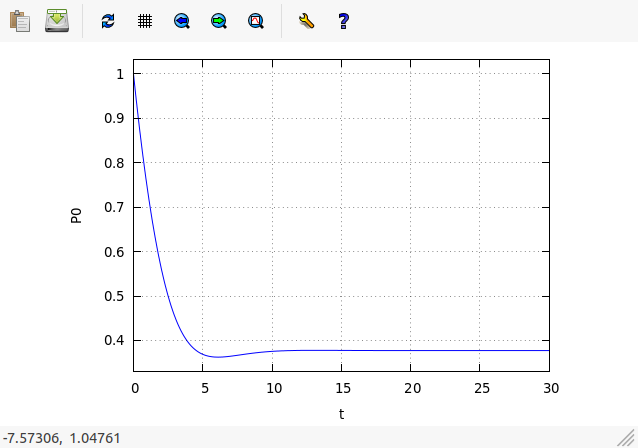

In [3]:
plot2d([discrete, makelist([p[1], p[3]], p, sol)], [xlabel, "t"],[ylabel, "P1"]);

(%o8)                                false

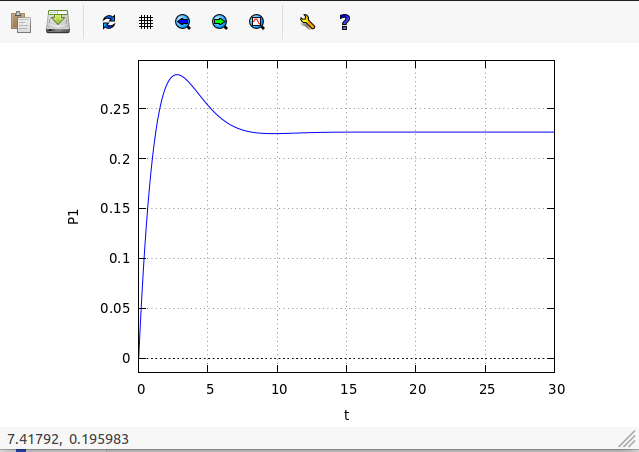

In [4]:
plot2d([discrete, makelist([p[1], p[4]], p, sol)], [xlabel, "t"],[ylabel, "P2"]);

(%o9)                                false

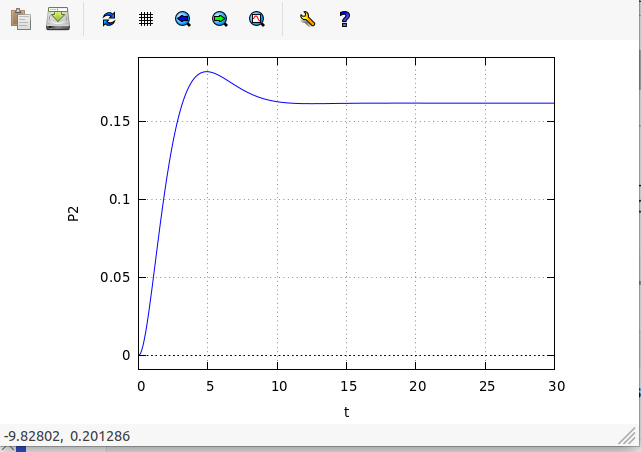

In [5]:
plot2d([discrete, makelist([p[1], p[5]], p, sol)], [xlabel, "t"],[ylabel, "P3"]);

(%o10)                               false

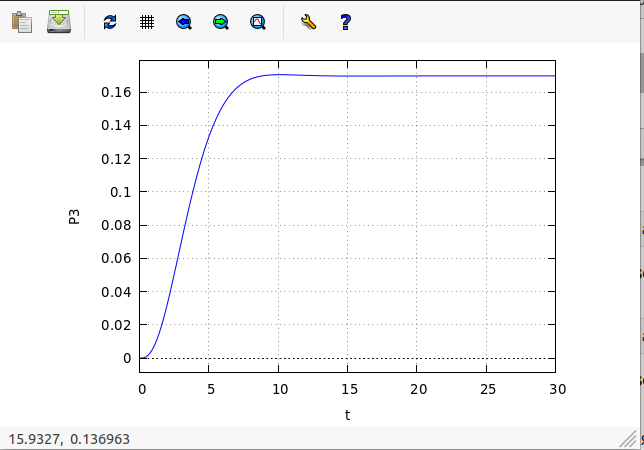

In [6]:
plot2d([discrete, makelist([p[1], p[6]], p, sol)], [xlabel, "t"],[ylabel, "P4"]);

(%o11)                               false

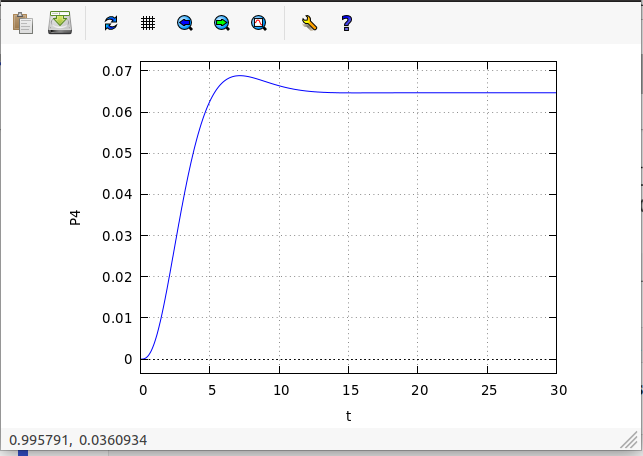

Из представленных графиков функций от частей преобразования Лапласа в WolframAlpha видно, что при увеличении $t$ они стремятся к нулю. Значит финальные вероятности:
$$P_0=\frac{20}{53}, P_1=\frac{12}{53}, P_2=\frac{60}{371}, P_3=\frac{9}{53}, P_4=\frac{24}{371}$$

Это можно увидеть и из графиков функций в maxima.

In [2]:
20/53+12/53+60/371+9/53+24/371;

(%o12)                                 1

Для проверки получим систему алгебраических уравнений и решим ее:

\begin{cases} -\lambda\cdot P_0+\mu\cdot P_3+\omega\cdot P_4=0 \\
              \lambda\cdot P_0-\nu\cdot P_1=0\\
              \nu\cdot P_1-\gamma\cdot P_2=0\\
              p\cdot\gamma P_2-\mu\cdot P_3=0\\
              (1-p)\gamma\cdot P_2-\omega\cdot P_4=0
\end{cases}

Подставляем вместо одного из уравнений уравнение нормировки и решаем получившуюся систему уравнений:
\begin{cases} -\lambda\cdot P_0+\mu\cdot P_3+\omega\cdot P_4=0 \\
              \lambda\cdot P_0-\nu\cdot P_1=0\\
              \nu\cdot P_1-\gamma\cdot P_2=0\\
              p\cdot\gamma P_2-\mu\cdot P_3=0\\
              P_0+P_1+P_2+P_3+P_4=1
\end{cases}


Решаем в maxima.

In [31]:
solve([-lambda*P0+mu*P3+omega*P4=0, 
        lambda*P0-nu*P1=0,
        nu*P1-gamma*P2=0, 
        p*gamma*P2-mu*P3=0,
        P0+P1+P2+P3+P4=1],
        [P0,P1,P2,P3,P4]);


rat: replaced -0.3 by -3/10 = -0.3

rat: replaced 0.4 by 2/5 = 0.4

rat: replaced 0.7 by 7/10 = 0.7

rat: replaced 0.3 by 3/10 = 0.3

rat: replaced -0.5 by -1/2 = -0.5

rat: replaced 0.5 by 1/2 = 0.5

rat: replaced -0.7 by -7/10 = -0.7

rat: replaced 0.42 by 21/50 = 0.42

rat: replaced -0.4 by -2/5 = -0.4


                      20       12       60        9        24
(%o124)        [[P0 = --, P1 = --, P2 = ---, P3 = --, P4 = ---]]
                      53       53       371       53       371

Таким образом, получаем ровно такие же решения. Получим их в символьном виде:

In [33]:
kill(lambda,mu,nu,p,gamma,omega)$
solve([-lambda*P0+mu*P3+omega*P4=0, 
        lambda*P0-nu*P1=0,
        nu*P1-gamma*P2=0, 
        p*gamma*P2-mu*P3=0,
        P0+P1+P2+P3+P4=1],
        [P0,P1,P2,P3,P4]);

(%o127) [[P0 = (mu nu omega gamma)/((omega (mu (gamma + nu) + nu p gamma)
 + mu nu (1 - p) gamma) lambda + mu nu omega gamma), 
P1 = (mu omega gamma lambda)/((omega (mu (gamma + nu) + nu p gamma)
 + mu nu (1 - p) gamma) lambda + mu nu omega gamma), 
P2 = (mu nu omega lambda)/((omega (mu (gamma + nu) + nu p gamma)
 + mu nu (1 - p) gamma) lambda + mu nu omega gamma), 
P3 = (nu omega p gamma lambda)/((omega (mu (gamma + nu) + nu p gamma)
 + mu nu (1 - p) gamma) lambda + mu nu omega gamma), 
P4 = - (mu nu (p - 1) gamma lambda)/((omega (mu (gamma + nu) + nu p gamma)
 + mu nu (1 - p) gamma) lambda + mu nu omega gamma)]]

Находим характеристики системы:

**доля времени, в течение которого ЭВМ будет работать нормально** равна $P_0$;

In [3]:
float(20/53);

(%o13)                        0.3773584905660378

**доля времени, в течение которого ЭВМ будет работать с необнаруженным отказом** равна $P_1$;

In [4]:
float(12/53);

(%o14)                        0.2264150943396226

**средняя стоимость ремонтов и замен за единицу времени** - доля времени на ремонт среди всего времени работы системы составляет $P_3$, за единицу времени в среднем потребуется $\mu$ ремонтов, значит среднее количество ремонтов в единицу времени $\mu\cdot P_3$, а средняя стоимость ремонтов $\mu\cdot P_3\cdot r$, аналогично, средняя стоимость замен в единицу времени составит $\gamma\cdot P_4\cdot c$, итого, общая сумма составит: $\mu\cdot P_3\cdot r+\gamma\cdot P_4\cdot c$;

**средняя величина потерь за единицу времени от работающей неисправной ЭВМ** аналогично $\nu\cdot P_1\cdot l$.

## Задача 3.

В базу данных поступает информация, каждая единица, поступившая в базу данных, хранится в ней бессрочно. Интенсивность поступления $\lambda=2.5 \text{kB/s}$, имеет показательное распределение. Найти математическое ожидание и дисперсию случайной величины $X(\tau)$ - объем базы данных на момент времени $\tau$.

*Модификация*

Каждая единица информации не хранится бессрочно, а удаляется с интенсивностью $\mu$ (поток пуассоновский).

### Решение.

Рисуем граф состояний:

<img src="dia2.jpeg">

Запишем уравнения Колмогорова:

$$\frac{dP_0(t)}{dt}=-\lambda\cdot P_0(t)$$
$$\frac{dP_1(t)}{dt}=\lambda\cdot P_0(t)-\lambda\cdot P_1(t)$$
$$\ldots$$
$$\frac{dP_k(t)}{dt}=\lambda\cdot P_{k-1}(t)-\lambda\cdot P_k(t)$$

Будем рассматривать случайную величину $X(t)$ - объем базы данных на момент времени $t$. Это дискретная случайная величина, $S_i$ - состояние, определяющее, что $X(t)=i$. Математическое ожидание $X(t)$ выразится:

$$M(X(t))=\sum_{k=1}^\infty P_k(t)\cdot k$$

Вместо этого найдем:
$$\frac{d(M(X(t))}{dt}=\sum_{k=1}^\infty \frac{P_k(t)}{dt}\cdot k=\sum_{k=1}^\infty\left(\lambda\cdot P_{k-1}(t)-\lambda\cdot P_k(t)\right)\cdot k$$

$$\frac{d(M(X(t))}{dt}=\lambda\left(\sum_{k=1}^\infty k\cdot P_{k-1}(t)-\sum_{k=1}^\infty k\cdot P_k(t)\right)$$
Используем, что $P_0(t)+\sum_{k=1}^\infty P_k(t)=1$

$$\frac{d(M(X(t))}{dt}=\lambda\left(1\cdot P_0(t)+\sum_{k=1}^\infty (k+1)\cdot P_{k}(t)-\sum_{k=1}^\infty k\cdot P_k(t)\right)$$

$$\frac{d(M(X(t))}{dt}=\lambda\left(1\cdot P_0(t)+\sum_{k=1}^\infty k\cdot P_{k}(t)-\sum_{k=1}^\infty k\cdot P_k(t)+\sum_{k=1}^\infty P_{k}(t)\right)=\lambda$$

$$\int_0^\tau d(M(X(t)))=\lambda\cdot \int_0^\tau dt\Rightarrow M(X(\tau))=\lambda\tau$$

Найдем дисперсию:
$$D(X(t))=\sum_{k=0}^\infty(k-\lambda\tau)^2\cdot P_k(t)$$

## Задача 4.

Одноядерный микропроцессор ставит выполнямые задачи в очередь с ограничением не больше двух задач, иногда микропроцессор переключается на выполнение своих задач. Задача, которая выполняется в этот момент, помещается в очередь, в противном случае убивается. Интенсивность потока задач $\lambda$, потока выполнения задач $\mu$, среднее время перечлючения операционной системы на выполнение своих задач $t_1$, среднее время выполнения своих задач $t_2$. Определить возможные состояния системы и финальные вероятности нахождения в них, вероятность простоя, вероятность образования очереди, вероятность отказа, абсолютную пропускную способность, среднюю длину очереди, среднее время нахождения в очереди.

*Модификация*

Двухядерный микропроцессор.

### Решение.

Обозначим $\nu=\frac{1}{t_1}, \gamma=\frac{1}{t_2}$.

Введем следующие состояния: 

$S_0$ - нет выполняемых задач, микропроцессор готов выполнять внешние задачи;

$S_1$ - микропроцессор занят выполнением внешней задачи, очереди нет;

$S_2$ - микропроцессор занят выполнением внешней задачи, в очереди одна задача;

$S_3$ - микропроцессор занят выполнением внешней задачи, в очереди две задачи;

$S_4$ - микропроцессор переключился на свои задачи, в очереди нет задач;

$S_5$ - микропроцессор переключился на свои задачи, в очереди одна задача;

$S_6$ - микропроцессор переключился на свои задачи, в очереди две задачи.

<img src="dia3.jpeg">

Составим уравнения Колмогорова.

$$\frac{dP_0(t)}{dt}=-(\lambda+\nu)P_0(t)+\mu\cdot P_1(t)+\gamma\cdot P_4(t)$$
$$\frac{dP_1(t)}{dt}=\lambda\cdot P_0(t)-(\lambda+\mu+\nu)\cdot P_1(t)+\mu\cdot P_2(t)+\gamma\cdot P_5(t)$$
$$\frac{dP_2(t)}{dt}=\lambda\cdot P_1(t)-(\lambda+\mu+\nu)\cdot P_2(t)+\mu\cdot P_3(t)+\gamma\cdot P_6(t)$$
$$\frac{dP_3(t)}{dt}=\lambda\cdot P_2(t)-(\mu+\nu)\cdot P_3(t)$$
$$\frac{dP_4(t)}{dt}=\nu\cdot P_0(t)-(\lambda+\gamma)\cdot P_4(t)$$
$$\frac{dP_5(t)}{dt}=\nu\cdot P_1(t)+\lambda\cdot P_4(t)-(\lambda+\gamma)\cdot P_5(t)$$
$$\frac{dP_6(t)}{dt}=\nu\cdot P_2(t)+\nu\cdot P_3(t)+\lambda\cdot P_5(t)-\gamma\cdot P_6(t)$$
и уравнение нормировки:
$$P_0(t)+P_1(t)+P_2(t)+P_3(t)+P_4(t)+P_5(t)+P_6(t)=1$$

Найдем финальные вероятности:

In [9]:
kill(lambda, mu,nu,gamma)$
solve([-(lambda+nu)*P0+mu*P1+gamma*P4=0,
      lambda*P0-(lambda+mu+nu)*P1+mu*P2+gamma*P5=0,
      lambda*P1-(lambda+mu+nu)*P2+mu*P3+gamma*P6=0,
      lambda*P2-(mu+nu)*P3=0,
      nu*P0-(lambda+gamma)*P4=0,
      nu*P1+lambda*P4-(lambda+gamma)*P5=0,
      P0+P1+P2+P3+P4+P5+P6=1],
      [P0,P1,P2,P3,P4,P5,P6]);
      

                  2        3              2        2          3       2
(%o15) [[P0 = ((mu  nu + mu ) gamma lambda  + (2 mu  nu + 2 mu ) gamma  lambda
      2        3       3                      5
 + (mu  nu + mu ) gamma )/((gamma + nu) lambda
           2                           2                4
 + (2 gamma  + (5 nu + mu) gamma + 3 nu  + mu nu) lambda
         3                      2        2               2              3
 + (gamma  + (5 nu + 2 mu) gamma  + (7 nu  + 6 mu nu + mu ) gamma + 3 nu
          2     2           3                   3
 + 4 mu nu  + mu  nu) lambda  + ((nu + mu) gamma
        2                 2       2        3          2       2        3
 + (3 nu  + 5 mu nu + 2 mu ) gamma  + (3 nu  + 7 mu nu  + 5 mu  nu + mu ) gamma
     4          3       2   2     3           2
 + nu  + 3 mu nu  + 3 mu  nu  + mu  nu) lambda
               2       3           2       2          3       2
 + ((mu nu + mu ) gamma  + (2 mu nu  + 4 mu  nu + 2 mu ) gamma
         3       2

Подставим некоторые численные значения и найдем численные значения финальных вероятностей:

In [14]:
lambda:1$ nu:0.5$ mu:0.8$ gamma:1.2$
solve([-(lambda+nu)*P0+mu*P1+gamma*P4=0,
      lambda*P0-(lambda+mu+nu)*P1+mu*P2+gamma*P5=0,
      lambda*P1-(lambda+mu+nu)*P2+mu*P3+gamma*P6=0,
      lambda*P2-(mu+nu)*P3=0,
      nu*P0-(lambda+gamma)*P4=0,
      nu*P1+lambda*P4-(lambda+gamma)*P5=0,
      P0+P1+P2+P3+P4+P5+P6=1],
      [P0,P1,P2,P3,P4,P5,P6]);


rat: replaced -1.5 by -3/2 = -1.5

rat: replaced 0.8 by 4/5 = 0.8

rat: replaced 1.2 by 6/5 = 1.2

rat: replaced -2.3 by -23/10 = -2.3

rat: replaced 0.8 by 4/5 = 0.8

rat: replaced 1.2 by 6/5 = 1.2

rat: replaced -2.3 by -23/10 = -2.3

rat: replaced 0.8 by 4/5 = 0.8

rat: replaced 1.2 by 6/5 = 1.2

rat: replaced -1.3 by -13/10 = -1.3

rat: replaced 0.5 by 1/2 = 0.5

rat: replaced -2.2 by -11/5 = -2.2

rat: replaced 0.5 by 1/2 = 0.5

rat: replaced -2.2 by -11/5 = -2.2


              402688        617760        999700        769000         91520
(%o28) [[P0 = -------, P1 = -------, P2 = -------, P3 = -------, P4 = -------, 
              3951293       3951293       3951293       3951293       3951293
                                                        182000        888625
                                                   P5 = -------, P6 = -------]]
                                                        3951293       3951293

In [15]:
float(%);

(%o29) [[P0 = 0.1019129687421307, P1 = 0.1563437588657688, 
P2 = 0.2530057882318522, P3 = 0.1946198371014248, P4 = 0.02316203835048426, 
P5 = 0.04606087171971301, P6 = 0.2248947369886262]]

Найдем численное решение системы дифференциальных уравнений:

In [11]:
sol: rk([-(lambda+nu)*P0+mu*P1+gamma*P4,
      lambda*P0-(lambda+mu+nu)*P1+mu*P2+gamma*P5,
      lambda*P1-(lambda+mu+nu)*P2+mu*P3+gamma*P6,
      lambda*P2-(mu+nu)*P3,
      nu*P0-(lambda+gamma)*P4,
      nu*P1+lambda*P4-(lambda+gamma)*P5,
      nu*P2+nu*P3+lambda*P5-gamma*P6], [P0,P1,P2,P3,P4,P5,P6], [1, 0, 0, 0, 0, 0, 0],[t, 0, 30, 0.02])$

In [12]:
plot2d([discrete, makelist([p[1], p[2]], p, sol)], [xlabel, "t"],[ylabel, "P0"]);

(%o22)                               false

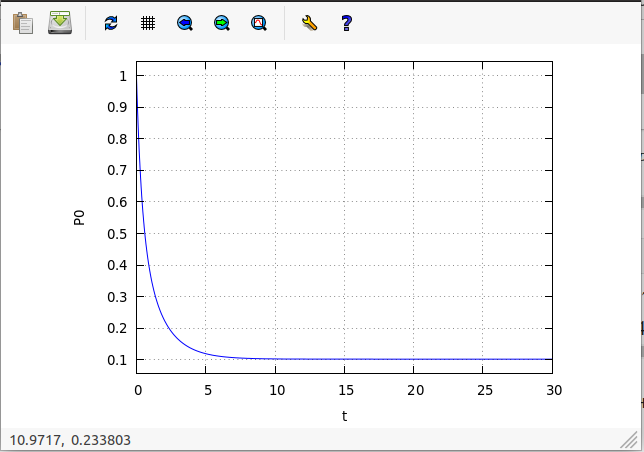

In [16]:
plot2d([discrete, makelist([p[1], p[3]], p, sol)], [xlabel, "t"],[ylabel, "P1"]);

(%o30)                               false

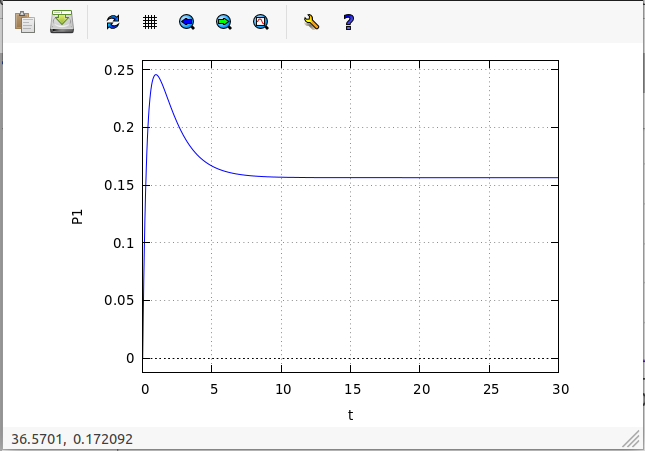

In [17]:
plot2d([discrete, makelist([p[1], p[4]], p, sol)], [xlabel, "t"],[ylabel, "P2"]);

(%o31)                               false

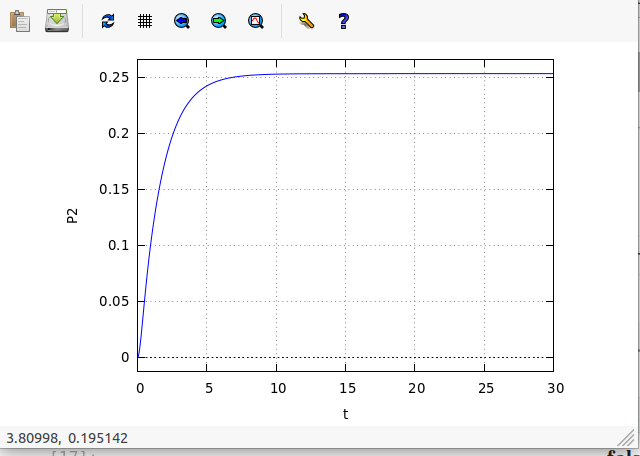

In [18]:
plot2d([discrete, makelist([p[1], p[5]], p, sol)], [xlabel, "t"],[ylabel, "P3"]);

(%o32)                               false

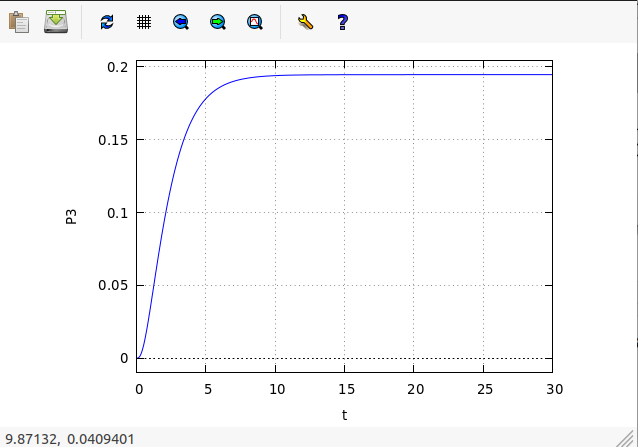

In [19]:
plot2d([discrete, makelist([p[1], p[6]], p, sol)], [xlabel, "t"],[ylabel, "P4"]);

(%o33)                               false

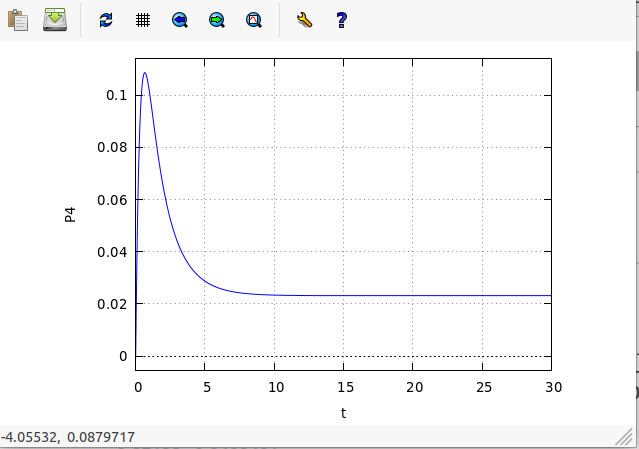

In [20]:
plot2d([discrete, makelist([p[1], p[7]], p, sol)], [xlabel, "t"],[ylabel, "P5"]);

(%o34)                               false

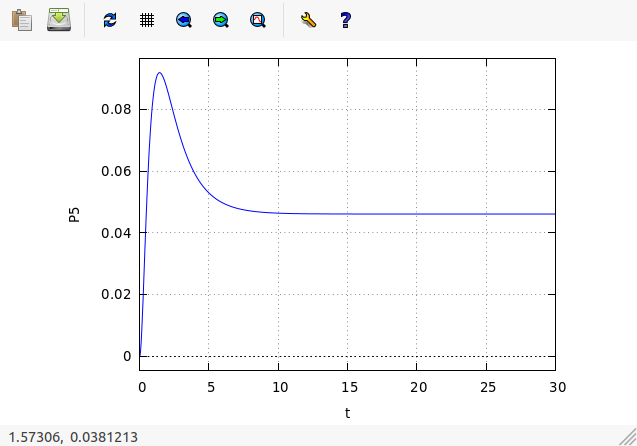

In [21]:
plot2d([discrete, makelist([p[1], p[8]], p, sol)], [xlabel, "t"],[ylabel, "P6"]);

(%o35)                               false

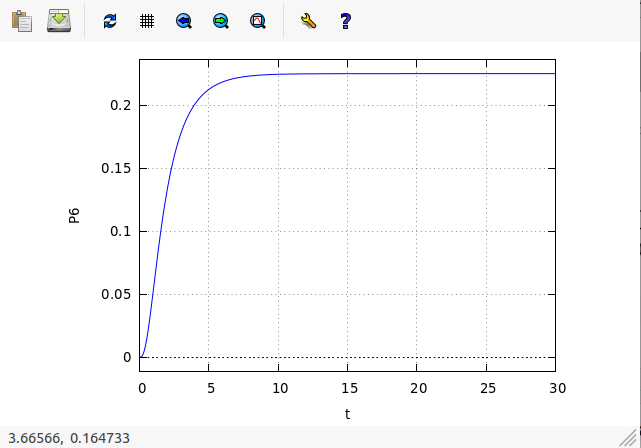

- вероятность простоя равна $P_0(t)$
- вероятность образования очереди равна $P_2(t)+P_3(t)+P_5(t)+P_6(t)$
- вероятность отказа равна $P_3(t)+P_6(t)$, абсолютная пропускная способность равна $\lambda'=\lambda\cdot(1-P_3(t)-P_6(t))$
- средняя длина очереди:
$$L_{\text{оч}}=1\cdot P_5(t)+2\cdot P_6(t)+1\cdot P_2(t)+2\cdot P_3(t)$$
- среднее время нахождения в очереди:
$$W_{\text{оч}}=\frac{L_{\text{оч}}}{\lambda}$$

## Задача 5.

Имеется система из двух серверов, в параллель обслуживающих запросы пользователей, если сервер занят обработкой запроса, остальные запросы уходят на другой сервер или получают отказ, если и он занят. На вход системы поступает поток с интенсивностью $\lambda=2$ заявки/ч. Среднее время обслуживания одной заявки $t_{\text{обсл}}=0.8$ ч. Каждая обслуженная заявка приносит доход $c=4000$ руб. Содержание каждого сервера 2000 руб/ч. Оценить выгодно ли увеличить число серверов до трех? 

### Решение.

Поскольку имеется простейшая двухканальная СМО с отказами, то используем формулы (20), (21) из лекции 4 при $k=2$, $\mu=1/t_{\text{обсл}}$:

$$P_0=\left(1+\frac{\lambda}{\mu}+\frac{\lambda^2}{2!\mu^2}\right)^{-1}$$
$$P_1=\frac{\lambda}{\mu}\cdot P_0$$
$$P_2=\frac{\lambda^2}{2!\mu^2}\cdot P_0$$

In [24]:
lambda:2$ mu:1/0.8$
P0:(1+lambda/mu+lambda^2/(2!*mu^2))^(-1);
P1:lambda/mu*P0;
P2:lambda^2/(2!*mu^2)*P0;

(%o48)                        0.2577319587628866

(%o49)                        0.4123711340206186

(%o50)                        0.3298969072164949

Вероятность обслуживания:
$$1-P_2$$
Абсолютная пропускная способность:
$\lambda'=\lambda\cdot (1-P_2)=2\cdot(1-0.329896907216494)\approx 1.34$

In [27]:
2*(1-0.329896907216494);

(%o52)                         1.340206185567012

Доход от обслуживания заявок: 

$D=\lambda'\cdot c\approx 1.34\cdot 4000=5360$ руб/ч

Чистая прибыль:

$D-2\cdot 2000=1360$ руб/ч

Рассчитаем аналогичные показатели, если бы было три канала:

In [31]:
P0:(1+lambda/mu+lambda^2/(2!*mu^2)+lambda^3/(3!*mu^3))^(-1);
P1:lambda/mu*P0;
P2:lambda^2/(2!*mu^2)*P0;
P3:lambda^3/(3!*mu^3)*P0;
lambdad:lambda*(1-P3);
lambdad*4000-3*2000;

(%o64)                        0.2191700759789597

(%o65)                        0.3506721215663355

(%o66)                        0.2805376972530684

(%o67)                        0.1496201052016365

(%o68)                         1.700759789596727

(%o69)                         803.0391583869077

Видно, что чистая прибыль составила бы 803 руб/ч. Таким образом, увеличение каналов до трех невыгодно.

## Задача 6.

Сервер имеет два канала и очередь на не более чем 4 элемента. Поток элементов простейший с интенсивностью $\lambda=1$ заявка/мин. Время обслуживания одной заявки показательное со средним значение $t_{\text{обсл}}=0.5$ мин. Найти финальные вероятности состояний, а также основные показатели эффективности: среднюю длину очереди, среднее время пребывания в очереди, среднее число заявок в СМО, среднее время пребывания в системе.

### Решение.

По условию задачи получаем простейшую многоканальную СМО  с ограничением очереди, ее поведение описывается формулами (40-47) из лекции 4.

Здесь:

$n=2, m=4, y=\frac{\lambda}{\mu}=1/2$.

Вероятность $P_0$:

$$P_0=\left(\sum_{k=0}^n \frac{y^k}{k!}+\frac{y^{n+1}}{n!\cdot n}\cdot \frac{1-\left(\frac{y}{n}\right)^{m}}{1-\frac{y}{n}}\right)^{-1}$$

In [11]:
n:2$ m:4$ y:1/2$

P0:1/(sum(y^k/k!, k,0,n)+y^(n+1)/(n!*n)*(1-(y/n)^m)/(1-y/n));

                                     2048
(%o34)                               ----
                                     3413

In [12]:
float(%);

(%o35)                        0.6000585994726048

Средняя длина очереди:
$$L_{\text{оч}}=\frac{y^nP_0}{n!}\cdot \frac{yn^{-m}(n^{m+1}-(m+1)ny^m+my^{m+1})}{(n-y)^2}$$

In [13]:
Loch:y^n*P0/n!*(y*n^(-m)*(n^(m+1)-(m+1)*n*y^m+m*y^(m+1)))/(n-y)^2;

                                     112
(%o36)                               ----
                                     3413

In [14]:
float(%);

(%o37)                        0.03281570465865807

Среднее время пребывания в очереди:

$$W_{\text{оч}}=\frac{L_{\text{оч}}}{\lambda}$$


In [15]:
Woch:Loch/1;

                                     112
(%o38)                               ----
                                     3413

Вероятность отказа:
$$P_{\text{отк}}=P_{n+m}=\frac{y^{n+m}}{n^m\cdot n!}\cdot P_0$$

In [17]:
Potk:y^(n+m)/(n^m*n!)*P0;

                                      1
(%o39)                               ----
                                     3413

In [18]:
float(%);

(%o40)                       2.929973630237328e-4

Среднее число заявок в системе:
$$L_{\text{сист}}=L_{\text{оч}}+y(1-P_{\text{отк}})$$

In [19]:
Lsys:Loch+y*(1-Potk);

                                     1818
(%o41)                               ----
                                     3413

In [20]:
float(%);

(%o42)                        0.5326692059771462

Среднее время нахождения заявки в системе:
$$T_{\text{сист}}=\frac{L_{\text{сист}}}{\lambda}$$

In [21]:
Tsys:Lsys/1;

                                     1818
(%o43)                               ----
                                     3413

## Задача 7.

Имеется простейшая n-канальная  система с неограниченной очередью, интенсивность простейшего входящего потока $\lambda$, простейшего потока обслуживания $\mu$. Время пребывания заявки в системе ограничено случайным временем $T$ (нетерпеливые заявки), распределенным по показательному закону с параметром $\nu$ (на каждую заявку, стоящую в очереди, действует поток уходов с интенсивностью $\nu$).

Написать формулы финальных вероятностей, найти пропускную способность, среднюю длину очереди, среднее время пребывания в очереди, среднее число заявок в СМО, среднее время пребывания в системе.

## Решение.

Граф состояний системы:

<img src="dia4.jpeg">

Используя схему размножения, гибели, получим финальные вероятности. Для удобства обозначим: $y=\frac{\lambda}{\mu}, z=\frac{\nu}{\mu}$, тогда получаем:

$$P_0=\left(1+\frac{y}{1!}+\frac{y^2}{2!}+\ldots+\frac{y^n}{n!}+\frac{y^n}{n!}\cdot\left(\frac{y}{n+z}+\frac{y^2}{(n+z)(n+2z)}+\frac{y^3}{(n+z)(n+2z)(n+3z)}+\ldots\right)\right)^{-1}$$
$$\frac{\lambda}{n\mu+\nu}=\frac{y}{n+z}$$

$$P_1=\frac{y}{1!}\cdot P_0, P_k=\frac{y^k}{k!}P_0, k\leq n$$
$$P_{n+1}=\frac{y^n}{n!}\cdot\frac{y}{n+z}P_0$$
$$P_{n+r}=\frac{y^n}{n!}\cdot \frac{y^r}{(n+z)(n+2z)\cdot\ldots\cdot (n+r\cdot z)}\cdot P_0, r\geq 1$$

Обозначим через $L_{\text{оч}}=\bar{r}$ - среднее число заявок в очереди.

Интенсивность потока уходов, приходящаяся на одну заявку, стоящую в очереди, равна $\nu$, значит суммарная средняя интенсивность потока уходов, приходящаяся на все заявки, стоящие в очереди, равна $\nu\cdot \bar{r}$.

Тогда абсолютная пропускная способность равна:
$$\lambda'=\lambda-\nu\cdot\bar{r}$$.

Среднее число занятых каналов $\bar{k}=\frac{\lambda'}{\mu}\Rightarrow \bar{r}=\frac{y-\bar{k}}{z}$

С другой стороны, 
$$\bar{k}=1\cdot P_1+2\cdot P_2+\ldots+(n+1)\cdot P_{n-1}+n(1-P_0-P_1-\ldots-P_{n-1})$$

Среднее время пребывания заявки в очереди:
$$W_{\text{оч}}=\frac{\bar{r}}{\lambda'}$$
Среднее число заявок в системе:
$$L_{\text{сист}}=\bar{r}+\bar{k}$$

Среднее время пребывания заявки в системе:
$$T_{\text{сист}}=\frac{L_{\text{сист}}}{\lambda'}$$

## Задачи для самостоятельного решения

1. В отделении коммерческого банка работает один консультант, который консультирует клиентов по всем вопросам работы отделения. В среднем на консультацию одного клиента уходит 12 мин. Клиенты к консультанту подходят независимо друг от друга в среднем через каждые 40 мин, в случае если консультант занят, они уходят. Определите долю потери клиентов.

2. На основе размеченного графа постройте матрицу переходных вероятностей. Определите вероятности задержки в каждом состоянии.

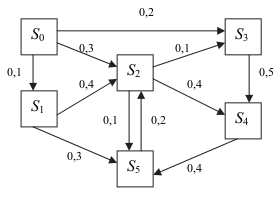

3. Инвестиционный паевой фонд «Селена» открыл филиал в пос. Черниговка. Филиал состоит из одного управляющего и действует по принципу финансовой пирамиды. Каждый входящий в фонд может завербовать нового клиента в среднем за 1 день. Человек, вступивший в фонд и сделавший денежный вклад, может выйти из него и забрать деньги только через месяц. Взрослое население пос. Черниговка составляет 1873 чел. Если в поселке не останется никого, кто не вошел бы в фонд, бизнес погибнет. Нарисуйте размеченный граф, описывающий изменение во времени численности населения пос. Черниговка, входящего в фонд. Запишите систему уравнений Колмогорова.

4. Определите оптимальное число телефонных номеров, необходимых для установки на коммерческом предприятии, при условии, что заявки на переговоры поступают с интенсивностью 90 звонков в час, а средняя продолжительность разговора по телефону составляет 2 мин.

5. Имеется простейшая трехканальная система массового обслуживания с неограниченной очередью. Интенсивность потока заявок -  4 заявки в час, среднее время обслуживания составляет 0,5 ч. Выгодно ли, имея в виду: 1) среднюю длину очереди; 2) среднее время пребывания заявки в очереди и 3) среднее время пребывания заявки в системе, объединить все три канала в один с втрое меньшим средним временем обслуживания?

6. Рабочий обслуживает 4 станка, каждый станок отказывает с интенсивностью 0,5 отказа в час. Среднее время ремонта одного станка 0,8 ч. Все потоки событий простейшие. Определите основные показатели, характеризующие систему массового обслуживания.

7. Двое рабочих обслуживают 6 станков. Станок требует наладки в среднем каждые полчаса. Наладка занимает у рабочего в среднем 10 мин. Все потоки событий простейшие. Определите характеристики системы массового обслуживания. Установите, улучшатся ли характеристики системы массового обслуживания, если рабочие будут налаживать станки совместно, тратя вдвоем на наладку в среднем 5 мин.